In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


tf.__version__


'2.0.0-beta1'

In [5]:
trainData = pd.read_csv('data/train.csv')
trainData["label"]

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [6]:
y_train = trainData['label']
np.array(y_train).shape

(42000,)

In [7]:
trainData.shape

(42000, 785)

In [8]:
# 获取数据集中的数据的值
trainData.values

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
x_train = trainData.values[:, 1:]
print(x_train.shape)
x_train

(42000, 784)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
y_train = trainData.values[:, 0]
print(y_train.shape) 
y_train

(42000,)


array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [11]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=500, activation='relu'))
model.add(keras.layers.Dense(units=500, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))


In [12]:
testData = pd.read_csv('data/test.csv')
testData.values[:, 1:].shape

(28000, 783)

In [13]:
testData.values[:, 0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
# 加载数据
def load_data(): 
    print("====>>===>>===>> LoadData")
    trainData = pd.read_csv('data/train.csv')
    testData = pd.read_csv('data/test.csv')
    x_train = trainData.values[:, 1:]
    y_train = trainData.values[:, 0]
    x_test = testData.values[:, :]
    # 归一化
    x_train = x_train/255
    x_test = x_test/255
    return x_train, y_train, x_test
    pass    


In [15]:
# 降低数据维度
def data_pca(x_train, x_test, COMPONENT_NUM):
    print("====>>===>>===>> PCA ")
    pca = PCA(n_components=COMPONENT_NUM, copy=True, whiten=False)  # 创建一个 PCA 对象
    pca.fit(x_train)    # 构建 PCA 模型
    pcaXTrain = pca.transform(x_train)
    pcaXTest = pca.transform(x_test)

    return pcaXTrain, pcaXTest


In [16]:
# 训练模型    
def create_model(x_train, y_train, x_test):
    print("====>>===>>===>> TrainMoel ")
    
    # 需要定义输入层的大小，不然保存的模型也有问题
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=500, input_shape=(x_train.shape[1], ), activation='relu'))
    model.add(keras.layers.Dense(units=500, activation='relu'))
    model.add(keras.layers.Dense(units=10, activation='softmax'))

    model.compile(optimizer='adam', 
                    loss='sparse_categorical_crossentropy', 
                    metrics=['accuracy'])
    # epochs：表示一共训练的周期， batch_size：把多少层组合成一个训练单元，多线程加速
    model.fit(x_train, y_train, epochs=10, batch_size=32)
    model.summary()
    # 测试模型
     #保存模型
    model.save('model/model1.h5')
    
    # 预测数据
    result = model.predict(x_test)
    print(result)


In [17]:
x_train, y_train, x_test = load_data()

====>>===>>===>> LoadData


In [18]:
pcax_train, pcax_test = data_pca(x_train, x_test, 0.9)

====>>===>>===>> PCA 


In [19]:
print(pcax_train.shape, pcax_test.shape)
print(pcax_test[0])

(42000, 87) (28000, 87)
[ 3.32190522 -0.46932019  3.13070354  2.45306793  1.20052657  2.0740953
  0.7346459   0.27082966 -1.24310581  0.98568907  2.56808197 -0.69164042
 -1.33896483 -0.48007285 -0.31666621 -0.85383598 -1.7598985   1.1127037
 -1.28484004 -0.65576391 -0.97138322  0.58110974  1.16467351 -1.84140247
  0.2579552  -0.46572042 -0.14093324 -0.23201418 -0.45428519 -0.67112547
  0.74915563 -0.77246594 -0.26646933  0.91617133  0.17457964  0.45339475
  0.3875669  -0.07023289 -0.27877029 -0.295251   -0.2496131  -0.58785452
 -1.09315119  0.45731992  0.25754632  0.44007646  0.77251199 -0.37837487
  0.57031196 -0.0510938   0.42303002  0.02359084 -0.56939015 -0.09385663
  0.13332239 -0.30913786  0.01091749 -0.12600315  0.44814993  0.04855498
  0.19473891 -0.74181079  0.64441837  0.04463152  0.28666107 -0.65346968
  0.26273464  0.08131494  0.27357135 -0.15527749 -1.11881189  0.19038616
 -0.37652002 -0.06293331  0.59696919 -0.01591315 -0.23493578  0.56184488
  0.29340562  0.14012564  0.0

In [108]:
create_model(pcax_train, y_train, pcax_test)

====>>===>>===>> TrainMoel 
Train on 42000 samples
Epoch 1/10
42000/42000 [==============================] - 6s 148us/sample - loss: 0.1929 - accuracy: 0.9418
Epoch 2/10
42000/42000 [==============================] - 6s 137us/sample - loss: 0.0760 - accuracy: 0.9763
Epoch 3/10
42000/42000 [==============================] - 6s 146us/sample - loss: 0.0473 - accuracy: 0.9854
Epoch 4/10
42000/42000 [==============================] - 6s 136us/sample - loss: 0.0361 - accuracy: 0.9882
Epoch 5/10
42000/42000 [==============================] - 6s 132us/sample - loss: 0.0285 - accuracy: 0.9905
Epoch 6/10
42000/42000 [==============================] - 6s 131us/sample - loss: 0.0243 - accuracy: 0.9923
Epoch 7/10
42000/42000 [==============================] - 5s 131us/sample - loss: 0.0182 - accuracy: 0.9944
Epoch 8/10
42000/42000 [==============================] - 5s 124us/sample - loss: 0.0169 - accuracy: 0.9948
Epoch 9/10
42000/42000 [==============================] - 5s 124us/sample - loss: 0.0

In [85]:
pcax_train, pcax_test = data_pca(x_train, x_test, 0.9)

====>>===>>===>> PCA 


In [88]:
re = model.predict(np.array(pcax_test))

IndexError: list index out of range

In [21]:
model1 = keras.models.load_model('model/model1.h5')

In [22]:
pcax_test[0]

array([ 3.32190522, -0.46932019,  3.13070354,  2.45306793,  1.20052657,
        2.0740953 ,  0.7346459 ,  0.27082966, -1.24310581,  0.98568907,
        2.56808197, -0.69164042, -1.33896483, -0.48007285, -0.31666621,
       -0.85383598, -1.7598985 ,  1.1127037 , -1.28484004, -0.65576391,
       -0.97138322,  0.58110974,  1.16467351, -1.84140247,  0.2579552 ,
       -0.46572042, -0.14093324, -0.23201418, -0.45428519, -0.67112547,
        0.74915563, -0.77246594, -0.26646933,  0.91617133,  0.17457964,
        0.45339475,  0.3875669 , -0.07023289, -0.27877029, -0.295251  ,
       -0.2496131 , -0.58785452, -1.09315119,  0.45731992,  0.25754632,
        0.44007646,  0.77251199, -0.37837487,  0.57031196, -0.0510938 ,
        0.42303002,  0.02359084, -0.56939015, -0.09385663,  0.13332239,
       -0.30913786,  0.01091749, -0.12600315,  0.44814993,  0.04855498,
        0.19473891, -0.74181079,  0.64441837,  0.04463152,  0.28666107,
       -0.65346968,  0.26273464,  0.08131494,  0.27357135, -0.15

In [25]:
result2 = model1.predict(pcax_test)
result2

array([[6.1574412e-15, 4.9996232e-17, 1.0000000e+00, ..., 1.0842183e-13,
        6.5081071e-19, 1.1886485e-23],
       [1.0000000e+00, 5.1116769e-29, 9.8039443e-20, ..., 3.6675437e-23,
        2.8524270e-26, 1.8714759e-24],
       [8.8734966e-13, 2.6316840e-10, 3.2765943e-11, ..., 2.1017045e-06,
        5.9420029e-07, 9.9998724e-01],
       ...,
       [8.5461647e-27, 1.2091797e-21, 8.9393328e-21, ..., 2.0699934e-25,
        4.1863089e-16, 1.6704211e-17],
       [2.5744228e-15, 1.9188987e-17, 6.0984837e-16, ..., 1.3392792e-11,
        2.6227390e-13, 1.0000000e+00],
       [8.7608949e-18, 7.9788940e-18, 1.0000000e+00, ..., 4.0536419e-16,
        1.8211205e-17, 1.5846866e-18]], dtype=float32)

In [26]:
array = np.zeros((len(result2), 1))
for i in range(len(result2)):
    array[i] = np.argmax(result2[i])
    
array

array([[2.],
       [0.],
       [9.],
       ...,
       [3.],
       [9.],
       [2.]])

In [27]:
table = pd.DataFrame(array, columns=['label'])
table

,label
0,2.0
1,0.0
2,9.0
3,9.0
4,3.0
5,7.0
6,0.0
7,3.0
8,0.0
9,3.0


In [28]:
table.to_csv('data/test_label.csv')

In [31]:
trainData = x_train * 255
testData = x_test * 255

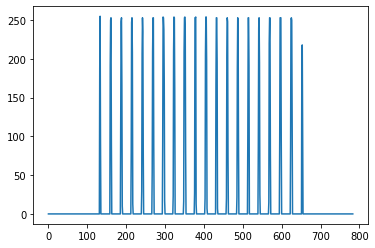

In [32]:
plt.plot(trainData[0])

In [34]:
plt.show()

In [68]:
image = np.zeros((28, 28))
for i in range(28):
    for j in range(28):
        image[i, j] = testData[0, i * 28 + j]
image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,
         17.,  17.,  17.,  17.,  81., 180., 180.,  35.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

<IPython.core.display.Javascript object>


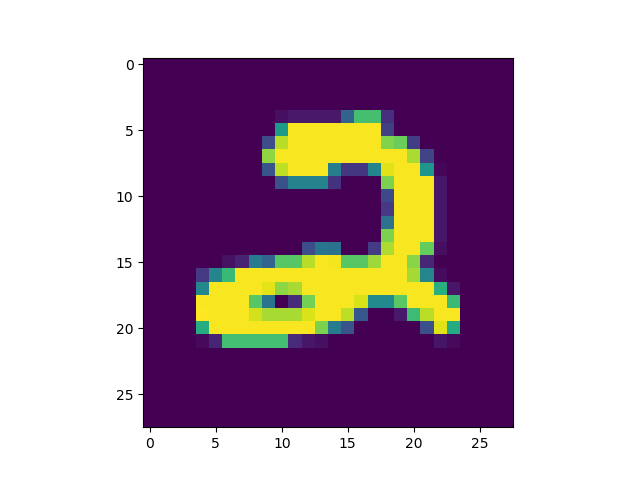

In [69]:
fig = plt.figure('image')
plt.imshow(image)


In [47]:
trainD = pd.read_csv('data/train.csv')
testD = pd.read_csv('data/test.csv')

In [70]:
testData = testD.values[:, :]
image2 = np.zeros(( 28, 28))

for j in range(28):
    for c in range(28):
        image2[ j, c] = testData[0, j * 28 + c]
            
image2
            

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,
         17.,  17.,  17.,  17.,  81., 180., 180.,  35.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

<IPython.core.display.Javascript object>


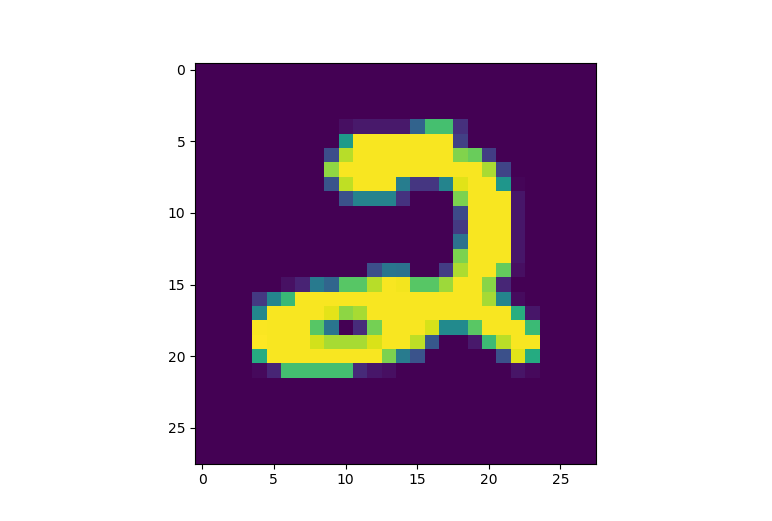

In [71]:
plt.figure()
plt.imshow(image2)